In [1]:
# !pip install pdfplumber
# https://github.com/jsvine/pdfplumber/blob/stable/examples/notebooks/extract-table-nics.ipynb
# !pip install Wand

In [128]:
import pdfplumber
import pandas as pd
import re
print(pdfplumber.__version__)

0.6.0


In [111]:
pdf = pdfplumber.open("C:\\Users\\aakas\\Aakash Nadupalli ipynb files\\GSTR3B.pdf")

In [112]:
pdf.pages

[<Page:1>, <Page:2>]

In [113]:
p0 = pdf.pages[0]

In [161]:
p0.extract_tables()[2][1]

['(a) Outward taxable supplies (other than zero rated, nil \nrated and exempted)',
 '1174706.00',
 'D\n65331.00',
 '73058.04',
 '73058.04',
 '0.00']

In [171]:
[i.replace('i\n',"").replace('I\n',"").replace('F\n',"").replace('E\n',"").replace('D\n',"").replace("\n","") 
 for i in p0.extract_tables()[2][5]]

['(e) Non-GST outward supplies', '0.00', '-', '-', '-', '-']

In [172]:
p0.extract_text().replace("\n","")

'Form GSTR-3B[See rule 61(5)]Year 2020-21Period Jan-Mar1. GSTIN 36ACBPN8071B1ZT2(a). Legal name of the registered person SRINIVAS  NADUPALLI 2(b). Trade name, if any SAI ENTERPRISES2(c). ARN AA360321558153HD2(d). Date of ARN 23/04/20213.1 Details of Outward supplies and inward supplies liable to reverse chargeNature of Supplies Total Taxable Value  Integrated Tax  Central  State/UT Tax  Cess (₹) (₹) Tax(₹) (₹) (₹)(a) Outward taxable supplies (other than zero rated, nil  1174706.00 65331.00 73058.04 73058.04 0.00Erated and exempted)(b) Outward taxable supplies (zero rated) 0.00 0.00 - - 0.00(c ) Other outward supplies (nil rated, exempted) 1927450.00 - - - -(d) Inward supplies (liable to reverse charge) 0.00 0.00 0.00 0.00 0.00(e) Non-GST outward supplies L0.00 - - - -3.2 Out of supplies made in 3.1 (a) above, details of inter-state supplies madeNature of Supplies Total Taxable Value (₹) Integrated Tax (₹)ISupplies made to Unregistered Persons 362950.00 65331.00Supplies made to Composit

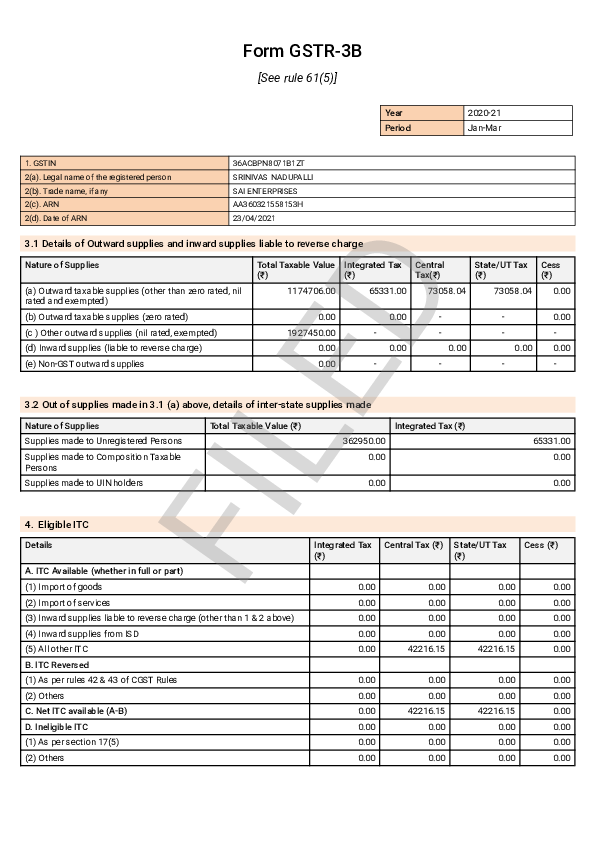

In [115]:
p0.to_image()

In [241]:
replacers.keys()

dict_keys(['a\n', 'b\n', 'c\n', 'd\n', 'e\n', 'f\n', 'g\n', 'h\n', 'i\n', 'j\n', 'k\n', 'l\n', 'm\n', 'n\n', 'o\n', 'p\n', 'q\n', 'r\n', 's\n', 't\n', 'u\n', 'v\n', 'w\n', 'x\n', 'y\n', 'z\n', 'A\n', 'B\n', 'C\n', 'D\n', 'E\n', 'F\n', 'G\n', 'H\n', 'I\n', 'J\n', 'K\n', 'L\n', 'M\n', 'N\n', 'O\n', 'P\n', 'Q\n', 'R\n', 'S\n', 'T\n', 'U\n', 'V\n', 'W\n', 'X\n', 'Y\n', 'Z\n'])

In [246]:
[i.replace(replacers,regex=True) for i in p0.extract_tables()[2][0]]

TypeError: str.replace() takes no keyword arguments

In [93]:
print(map(lambda s: s.strip(), p0.extract_tables()[2][0]))

In [20]:
a = {}
for i in range(len(p0.extract_tables()[0])):
    a[p0.extract_tables()[0][i][0]] = [p0.extract_tables()[0][i][1]]
pd.DataFrame(a)

,Year,Period
0,2020-21,Jan-Mar


In [19]:
a = {}
for i in range(len(p0.extract_tables()[1])):
    a[p0.extract_tables()[1][i][0]] = [p0.extract_tables()[1][i][1]]
pd.DataFrame(a).transpose()

,0
1. GSTIN,36ACBPN8071B1ZT
2(a). Legal name of the registered person,SRINIVAS NADUPALLI
"2(b). Trade name, if any",SAI ENTERPRISES
2(c). ARN,AA360321558153H
2(d). Date of ARN,23/04/2021


In [252]:
# a = pd.DataFrame(columns=[i.replace("\n"," ") for i in p0.extract_tables()[2][0]])
a = pd.DataFrame(columns=p0.extract_tables()[2][0])
for i in range(len(p0.extract_tables()[2][1:])):
    a.loc[i] = p0.extract_tables()[2][1:][i]
a

,Nature of Supplies,Total Taxable Value \n(₹),Integrated Tax \n(₹),Central \nTax(₹),State/UT Tax \n(₹),Cess \n(₹)
0,(a) Outward taxable supplies (other than zero ...,1174706.00,D\n65331.00,73058.04,73058.04,0.00
1,(b) Outward taxable supplies (zero rated),0.00,0.00,-,-,0.00
2,"(c ) Other outward supplies (nil rated, exempted)",1927450.00,-,-,-,-
3,(d) Inward supplies (liable to reverse charge),0.00,0.00,0.00,0.00,0.00
4,(e) Non-GST outward supplies,0.00,E\n-,-,-,-


In [253]:
# a["Integrated Tax  (₹)"].replace(replacers)
# a.replace({'Integrated Tax  (₹)' :replacers},regex=True)
a.replace(replacers,regex=True)

,Nature of Supplies,Total Taxable Value \n(₹),Integrated Tax \n(₹),Central \nTax(₹),State/UT Tax \n(₹),Cess \n(₹)
0,(a) Outward taxable supplies (other than zero ...,1174706.00,65331.00,73058.04,73058.04,0.00
1,(b) Outward taxable supplies (zero rated),0.00,0.00,-,-,0.00
2,"(c ) Other outward supplies (nil rated, exempted)",1927450.00,-,-,-,-
3,(d) Inward supplies (liable to reverse charge),0.00,0.00,0.00,0.00,0.00
4,(e) Non-GST outward supplies,0.00,-,-,-,-


In [254]:
a = pd.DataFrame(columns=[i.replace("\n"," ") for i in p0.extract_tables()[3][0]])
for i in range(len(p0.extract_tables()[3][1:])):
    a.loc[i] = p0.extract_tables()[3][1:][i]
a

,Nature of Supplies,Total Taxable Value (₹),Integrated Tax (₹)
0,Supplies made to Unregistered Persons,L\n362950.00,65331.00
1,Supplies made to Composition Taxable \nPersons,0.00,0.00
2,Supplies made to UIN holders,I\n0.00,0.00


In [255]:
a.replace(replacers,regex=True)

,Nature of Supplies,Total Taxable Value (₹),Integrated Tax (₹)
0,Supplies made to Unregistered Persons,362950.00,65331.00
1,Supplies made to Composition Taxable \nPersons,0.00,0.00
2,Supplies made to UIN holders,0.00,0.00


In [179]:
a = pd.DataFrame(columns=[i.replace("\n"," ") for i in p0.extract_tables()[3][0]])
for i in range(len(p0.extract_tables()[3][1:])):
    a.loc[i] = [i.replace("L\n","").replace('i\n',"").replace('I\n',"").replace('F\n',"").replace('E\n',"").replace('D\n',"").replace("\n","") for i in p0.extract_tables()[3][1:][i]]
a

,Nature of Supplies,Total Taxable Value (₹),Integrated Tax (₹)
0,Supplies made to Unregistered Persons,362950.00,65331.00
1,Supplies made to Composition Taxable Persons,0.00,0.00
2,Supplies made to UIN holders,0.00,0.00


In [180]:
a = pd.DataFrame(columns=[i.replace("\n"," ") for i in p0.extract_tables()[4][0]])
for i in range(len(p0.extract_tables()[4][1:])):
    a.loc[i] = [i.replace('i\n',"").replace('I\n',"").replace('F\n',"").replace('E\n',"").replace('D\n',"").replace("\n","") for i in p0.extract_tables()[4][1:][i]]
a

,F Details,Integrated Tax (₹),Central Tax (₹),State/UT Tax (₹),Cess (₹)
0,A. ITC Available (whether in full or part),,,,
1,(1) Import of goods,0.00,0.00,0.00,0.00
2,(2) Import of services,0.00,0.00,0.00,0.00
3,(3) Inward supplies liable to reverse charge (...,0.00,0.00,0.00,0.00
4,(4) Inward supplies from ISD,0.00,0.00,0.00,0.00
5,(5) All other ITC,0.00,42216.15,42216.15,0.00
6,B. ITC Reversed,,,,
7,(1) As per rules 42 & 43 of CGST Rules,0.00,0.00,0.00,0.00
8,(2) Others,0.00,0.00,0.00,0.00
9,C. Net ITC available (A-B),0.00,42216.15,42216.15,0.00


In [29]:
# import pdfplumber
# import re

In [109]:
# with pdfplumber.open("GSTR3B.pdf") as pdf:
#     for number,i in enumerate(pdf.pages,1):
#         print(" ")
#         print("-"*10)
#         print(" Page ",number)
#         print("-"*10)
#         print(" ")
#         print(i.extract_text())

 
----------
 Page  1
----------
 
Form GSTR-3B
[See rule 61(5)]
Year 2020-21
Period Jan-Mar
1. GSTIN 36ACBPN8071B1ZT
2(a). Legal name of the registered person SRINIVAS  NADUPALLI
 
2(b). Trade name, if any SAI ENTERPRISES
2(c). ARN AA360321558153H
D
2(d). Date of ARN 23/04/2021
3.1 Details of Outward supplies and inward supplies liable to reverse charge
Nature of Supplies Total Taxable Value  Integrated Tax  Central  State/UT Tax  Cess 
(₹) (₹) Tax(₹) (₹) (₹)
(a) Outward taxable supplies (other than zero rated, nil  1174706.00 65331.00 73058.04 73058.04 0.00
E
rated and exempted)
(b) Outward taxable supplies (zero rated) 0.00 0.00 - - 0.00
(c ) Other outward supplies (nil rated, exempted) 1927450.00 - - - -
(d) Inward supplies (liable to reverse charge) 0.00 0.00 0.00 0.00 0.00
(e) Non-GST outward supplies L0.00 - - - -
3.2 Out of supplies made in 3.1 (a) above, details of inter-state supplies made
Nature of Supplies Total Taxable Value (₹) Integrated Tax (₹)
I
Supplies made to Unregi

In [215]:
import string
for i in string.ascii_letters:
    print(f'{i}\\n'," ",end=" ")

a\n   b\n   c\n   d\n   e\n   f\n   g\n   h\n   i\n   j\n   k\n   l\n   m\n   n\n   o\n   p\n   q\n   r\n   s\n   t\n   u\n   v\n   w\n   x\n   y\n   z\n   A\n   B\n   C\n   D\n   E\n   F\n   G\n   H\n   I\n   J\n   K\n   L\n   M\n   N\n   O\n   P\n   Q\n   R\n   S\n   T\n   U\n   V\n   W\n   X\n   Y\n   Z\n   

In [236]:
replacers = {}
for i in string.ascii_letters:
    replacers[f'{i}\n'] =''
replacers

{'a\n': '',
 'b\n': '',
 'c\n': '',
 'd\n': '',
 'e\n': '',
 'f\n': '',
 'g\n': '',
 'h\n': '',
 'i\n': '',
 'j\n': '',
 'k\n': '',
 'l\n': '',
 'm\n': '',
 'n\n': '',
 'o\n': '',
 'p\n': '',
 'q\n': '',
 'r\n': '',
 's\n': '',
 't\n': '',
 'u\n': '',
 'v\n': '',
 'w\n': '',
 'x\n': '',
 'y\n': '',
 'z\n': '',
 'A\n': '',
 'B\n': '',
 'C\n': '',
 'D\n': '',
 'E\n': '',
 'F\n': '',
 'G\n': '',
 'H\n': '',
 'I\n': '',
 'J\n': '',
 'K\n': '',
 'L\n': '',
 'M\n': '',
 'N\n': '',
 'O\n': '',
 'P\n': '',
 'Q\n': '',
 'R\n': '',
 'S\n': '',
 'T\n': '',
 'U\n': '',
 'V\n': '',
 'W\n': '',
 'X\n': '',
 'Y\n': '',
 'Z\n': ''}

In [203]:
print(repr("\n"))

'\n'
